In [1]:
# Import essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ML libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import joblib

In [2]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("final_dataset.csv", sep=',')
print("Shape:", df.shape)
display(df.head())
df.info()

Saving final_dataset.csv to final_dataset.csv
Shape: (1000, 34)


,UserID,Age,Gender,Location,Income,Debt,Owns Property,Profession,Demographics,Platform,...,DeviceType,OS,Watch Time,Self Control,Addiction Level,CurrentActivity,ConnectionType,AvgTimePerSession,EngagementPerVideo,EngagementPerVideo_Log
0,1,56,1,Pakistan,82812,True,True,Engineer,1,2,...,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data,4.705882,357.590909,5.882182
1,2,46,0,Mexico,27999,False,True,Artist,0,2,...,Computer,Android,5:00 PM,7,3,At school,Wi-Fi,16.285714,191.741935,5.261352
2,3,32,0,United States,42436,False,True,Engineer,1,4,...,Tablet,Android,2:00 PM,8,2,At home,Mobile Data,5.000000,1239.142857,7.122982
3,4,60,1,Barzil,62963,True,False,Waiting staff,1,3,...,Smartphone,Android,9:00 PM,5,5,Commuting,Mobile Data,5.315789,60.414634,4.117648
4,5,25,1,Pakistan,22096,False,True,Manager,0,1,...,Smartphone,iOS,8:00 AM,10,0,At home,Mobile Data,22.666667,147.285714,4.999141


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   UserID                    1000 non-null   int64  
 1   Age                       1000 non-null   int64  
 2   Gender                    1000 non-null   int64  
 3   Location                  1000 non-null   object 
 4   Income                    1000 non-null   int64  
 5   Debt                      1000 non-null   bool   
 6   Owns Property             1000 non-null   bool   
 7   Profession                1000 non-null   object 
 8   Demographics              1000 non-null   int64  
 9   Platform                  1000 non-null   int64  
 10  Total Time Spent          1000 non-null   int64  
 11  Number of Sessions        1000 non-null   int64  
 12  Video ID                  1000 non-null   int64  
 13  Video Category            1000 non-null   object 
 14  Video Len

In [3]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop('Addiction Level', axis=1)
y = df_encoded['Addiction Level']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (800, 78)
Shape of X_test: (200, 78)
Shape of y_train: (800,)
Shape of y_test: (200,)


In [4]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [5]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best hyperparameters found:", best_params)

Best hyperparameters found: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [6]:
from sklearn.metrics import accuracy_score

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the tuned Random Forest model:", accuracy)

Accuracy of the tuned Random Forest model: 0.995


=== Baseline Random Forest ===
Accuracy: 0.995
Precision (Macro): 0.997
Recall (Macro): 0.996
F1-Score (Macro): 0.996

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        41
           3       1.00      0.97      0.98        33
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        18

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      0.99       200



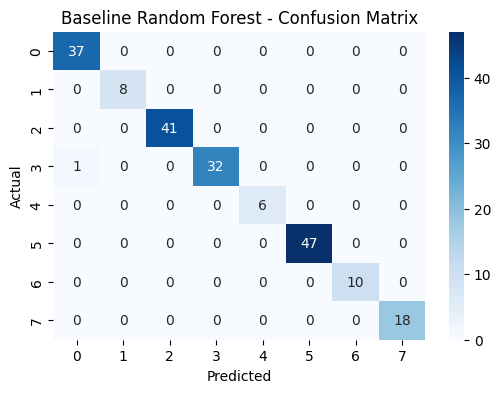

In [7]:
# =====================================
#  BASELINE RANDOM FOREST
# =====================================
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Train a baseline Random Forest with default parameters
baseline_rf = RandomForestClassifier(random_state=42)
baseline_rf.fit(X_train, y_train)

# Predictions
y_pred_baseline = baseline_rf.predict(X_test)

# Metrics
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline, average='macro')
recall_baseline = recall_score(y_test, y_pred_baseline, average='macro')
f1_baseline = f1_score(y_test, y_pred_baseline, average='macro')

print("=== Baseline Random Forest ===")
print(f"Accuracy: {accuracy_baseline:.3f}")
print(f"Precision (Macro): {precision_baseline:.3f}")
print(f"Recall (Macro): {recall_baseline:.3f}")
print(f"F1-Score (Macro): {f1_baseline:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_baseline))

# Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_baseline), annot=True, fmt='d', cmap='Blues')
plt.title("Baseline Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


=== Tuned Random Forest ===
Accuracy: 0.995
Precision (Macro): 0.997
Recall (Macro): 0.996
F1-Score (Macro): 0.996

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        41
           3       1.00      0.97      0.98        33
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        47
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        18

    accuracy                           0.99       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      0.99      0.99       200



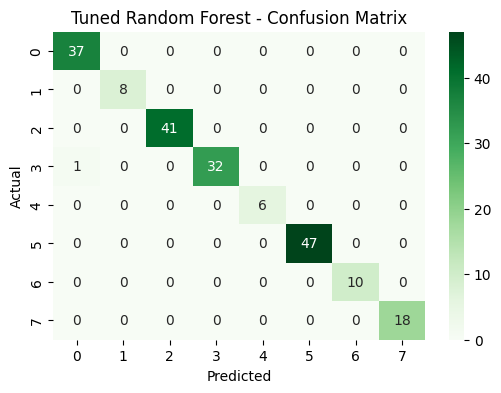

In [8]:
# =====================================
#  TUNED RANDOM FOREST (BEST MODEL)
# =====================================

y_pred_tuned = best_model.predict(X_test)

# Metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned, average='macro')
recall_tuned = recall_score(y_test, y_pred_tuned, average='macro')
f1_tuned = f1_score(y_test, y_pred_tuned, average='macro')

print("\n=== Tuned Random Forest ===")
print(f"Accuracy: {accuracy_tuned:.3f}")
print(f"Precision (Macro): {precision_tuned:.3f}")
print(f"Recall (Macro): {recall_tuned:.3f}")
print(f"F1-Score (Macro): {f1_tuned:.3f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

# Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Greens')
plt.title("Tuned Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


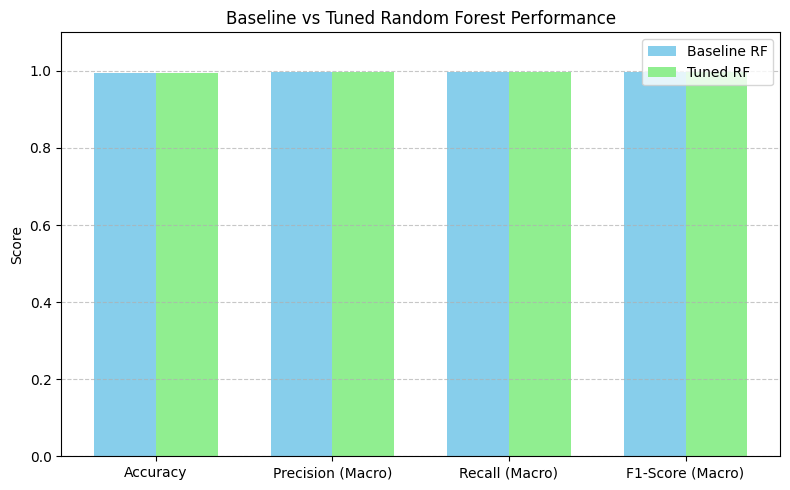

,Metric,Baseline,Tuned
0,Accuracy,0.995,0.995
1,Precision (Macro),0.997,0.997
2,Recall (Macro),0.996,0.996
3,F1-Score (Macro),0.996,0.996


In [9]:
# =====================================
#  COMPARISON VISUALIZATION
# =====================================

# Combine all metrics into a dataframe for visualization
metrics_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision (Macro)', 'Recall (Macro)', 'F1-Score (Macro)'],
    'Baseline': [accuracy_baseline, precision_baseline, recall_baseline, f1_baseline],
    'Tuned': [accuracy_tuned, precision_tuned, recall_tuned, f1_tuned]
})

# Plot side-by-side comparison
plt.figure(figsize=(8, 5))
x = np.arange(len(metrics_comparison['Metric']))
width = 0.35

plt.bar(x - width/2, metrics_comparison['Baseline'], width, label='Baseline RF', color='skyblue')
plt.bar(x + width/2, metrics_comparison['Tuned'], width, label='Tuned RF', color='lightgreen')

# Labels and formatting
plt.xticks(x, metrics_comparison['Metric'])
plt.ylabel('Score')
plt.ylim(0, 1.1)
plt.title('Baseline vs Tuned Random Forest Performance')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Display the comparison table
display(metrics_comparison.round(3))


In [11]:
# FINAL OUTCOME SUMMARY
# =====================================

print(" FINAL OUTCOME SUMMARY")
print("==========================")
print(f"Baseline Random Forest → Accuracy: {accuracy_baseline:.3f}, Precision: {precision_baseline:.3f}, Recall: {recall_baseline:.3f}, F1: {f1_baseline:.3f}")
print(f"Tuned Random Forest    → Accuracy: {accuracy_tuned:.3f}, Precision: {precision_tuned:.3f}, Recall: {recall_tuned:.3f}, F1: {f1_tuned:.3f}")

# Compare which model performed better
if accuracy_tuned > accuracy_baseline:
    print("\nThe Tuned Random Forest performed BETTER than the baseline model.")
else:
    print("\nThe Baseline Random Forest performed equally or better (no improvement from tuning).")

# Optional: show best hyperparameters used
print("\nBest Hyperparameters used for the Tuned Model:")
for param, value in best_params.items():
    print(f"  - {param}: {value}")


 FINAL OUTCOME SUMMARY
Baseline Random Forest → Accuracy: 0.995, Precision: 0.997, Recall: 0.996, F1: 0.996
Tuned Random Forest    → Accuracy: 0.995, Precision: 0.997, Recall: 0.996, F1: 0.996

The Baseline Random Forest performed equally or better (no improvement from tuning).

Best Hyperparameters used for the Tuned Model:
  - criterion: gini
  - max_depth: None
  - min_samples_leaf: 1
  - min_samples_split: 2
  - n_estimators: 100
